# 4. Generate altered images

In [49]:
import os
import glob
import pickle
import numpy as np

import matplotlib.pyplot as plt

from custom_gen import StyleGANGenerator
import cv2

Initialize StyleGAN2 generator

In [50]:
_stylegan_ffhq_f_gdrive_url = 'https://nvlabs-fi-cdn.nvidia.com/stylegan2/networks/stylegan2-ffhq-config-f.pkl'

gen = StyleGANGenerator(_stylegan_ffhq_f_gdrive_url)

### Optional: download feature axis

In [9]:
! cd ../03_regress_feature_axis/feature_directions && wget -nc data.belanec.eu/feature_directions/feature_direction_inceptionv3_5attr_tanh_normalized.pkl
! cd ../03_regress_feature_axis/feature_directions && wget -nc data.belanec.eu/feature_directions/feature_direction_inceptionv3_5attr_linear_normalized.pkl
! cd ../03_regress_feature_axis/feature_directions && wget -nc data.belanec.eu/feature_directions/feature_direction_eyeglasses_linear.pkl
! cd ../03_regress_feature_axis/feature_directions && wget -nc data.belanec.eu/feature_directions/feature_direction_eyeglasses_linear_normalized.pkl
! cd ../03_regress_feature_axis/feature_directions && wget -nc data.belanec.eu/feature_directions/feature_direction_eyeglasses_tanh.pkl
! cd ../03_regress_feature_axis/feature_directions && wget -nc data.belanec.eu/feature_directions/feature_direction_eyeglasses_tanh_normalized.pkl

File ‘feature_direction_inceptionv3_5attr_tanh_normalized.pkl’ already there; not retrieving.

File ‘feature_direction_inceptionv3_5attr_linear_normalized.pkl’ already there; not retrieving.

File ‘feature_direction_eyeglasses_linear.pkl’ already there; not retrieving.

File ‘feature_direction_eyeglasses_linear_normalized.pkl’ already there; not retrieving.

File ‘feature_direction_eyeglasses_tanh.pkl’ already there; not retrieving.

File ‘feature_direction_eyeglasses_tanh_normalized.pkl’ already there; not retrieving.



Select a feature direction file from: **03_regress_feature_axis/feature_directions**.

In [ ]:
_feature_direction_file = '../03_regress_feature_axis/feature_directions/feature_direction_inceptionv3_5attr_tanh_normalized.pkl'

In [51]:
with open(feature_direction_file, 'rb') as f:
    feature_direction_dict = pickle.load(f)

feature_direction = feature_direction_dict['direction']
feature_names = np.array(feature_direction_dict['name'])
print(feature_names)

array(['Eyeglasses', 'Smiling', 'Male', 'No_Beard', 'Young'], dtype='<U10')

### Image generation
Now you can uncomment seeds from which we generated images to the experimet or generate from random (leave RandomState function empty).

**imgs1** are images generated from unmodified latent vectors

**imgs2** are images generated from unmodified latent vectors (in example below, you can see adding Male and substracting No_Beard attribute)

To add custom attribute simply add or substract any combination of **feature_direction\[:, x\]** from the latent at **imgs2** variable, where x is the number of feature:
- 0: Eyeglasses
- 1: Smiling
- 2: Male
- 3: No_Beard
- 4: Young

In [52]:
# rnd = np.random.RandomState(1568) # eyeglasses tanh
rnd = np.random.RandomState(1569) # beard male tanh
# rnd = np.random.RandomState(1570) # smiling female young tanh

# rnd = np.random.RandomState(1571) # eyeglasses linear
# rnd = np.random.RandomState(1572) # beard male linear
# rnd = np.random.RandomState(1573) # smiling female young linear

latents = rnd.randn(9, *gen.Gs.input_shape[1:])

imgs1 = gen.get_images(latents)
imgs2 = gen.get_images(latents + feature_direction[:, 2] - feature_direction[:, 3])

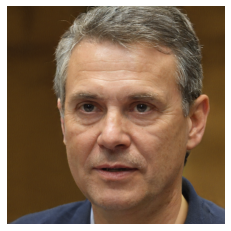

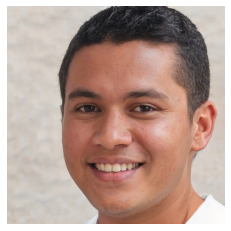

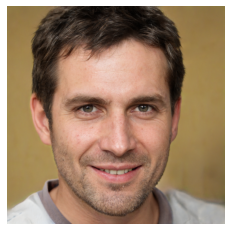

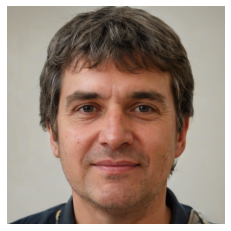

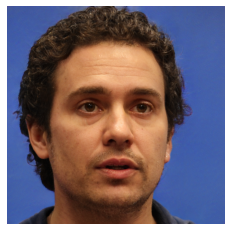

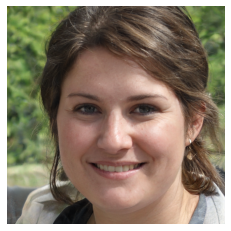

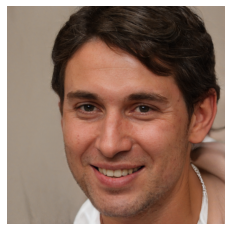

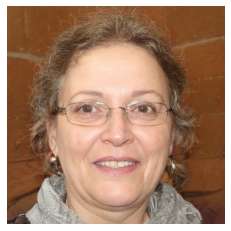

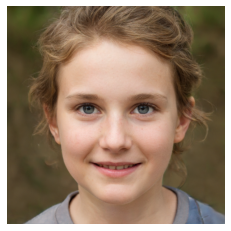

In [54]:
for img in imgs1:
    plt.axis("off")
    plt.imshow(img/255)
    plt.show()

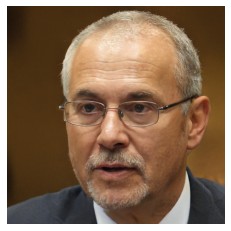

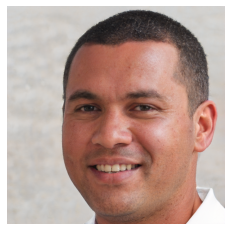

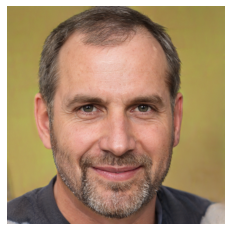

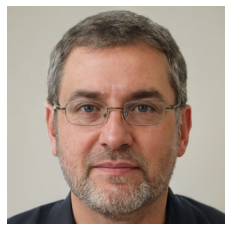

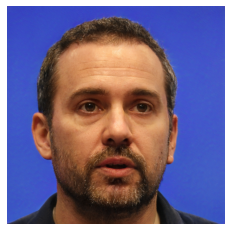

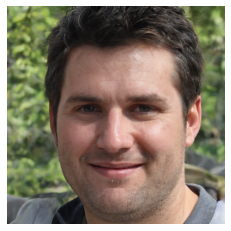

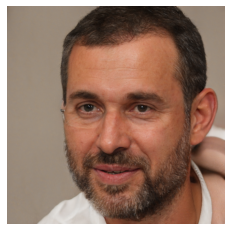

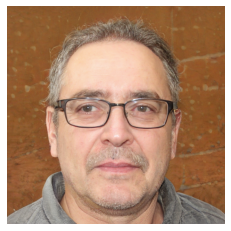

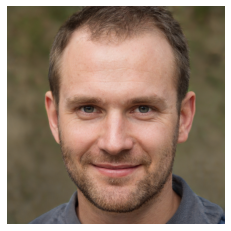

In [55]:
for img in imgs2:
    plt.axis("off")
    plt.imshow(img/255)
    plt.show()

### Optional: Save generated images
Uncomment and run to save.

In [56]:
# save_path = './'

In [57]:
# for i, img in enumerate(imgs2):
#     img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# #     img = cv2.resize(img, (256,256), interpolation=cv2.INTER_LANCZOS4)
#     cv2.imwrite(save_path + 'papersample2_gen-' + str(i) + '.png', img)

In [58]:
# for i, img in enumerate(imgs1):
#     img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# #     img = cv2.resize(img, (256,256), interpolation=cv2.INTER_LANCZOS4)
#     cv2.imwrite(save_path + 'papersample2-' + str(i) + '.png', img)

## Feature preview image generation

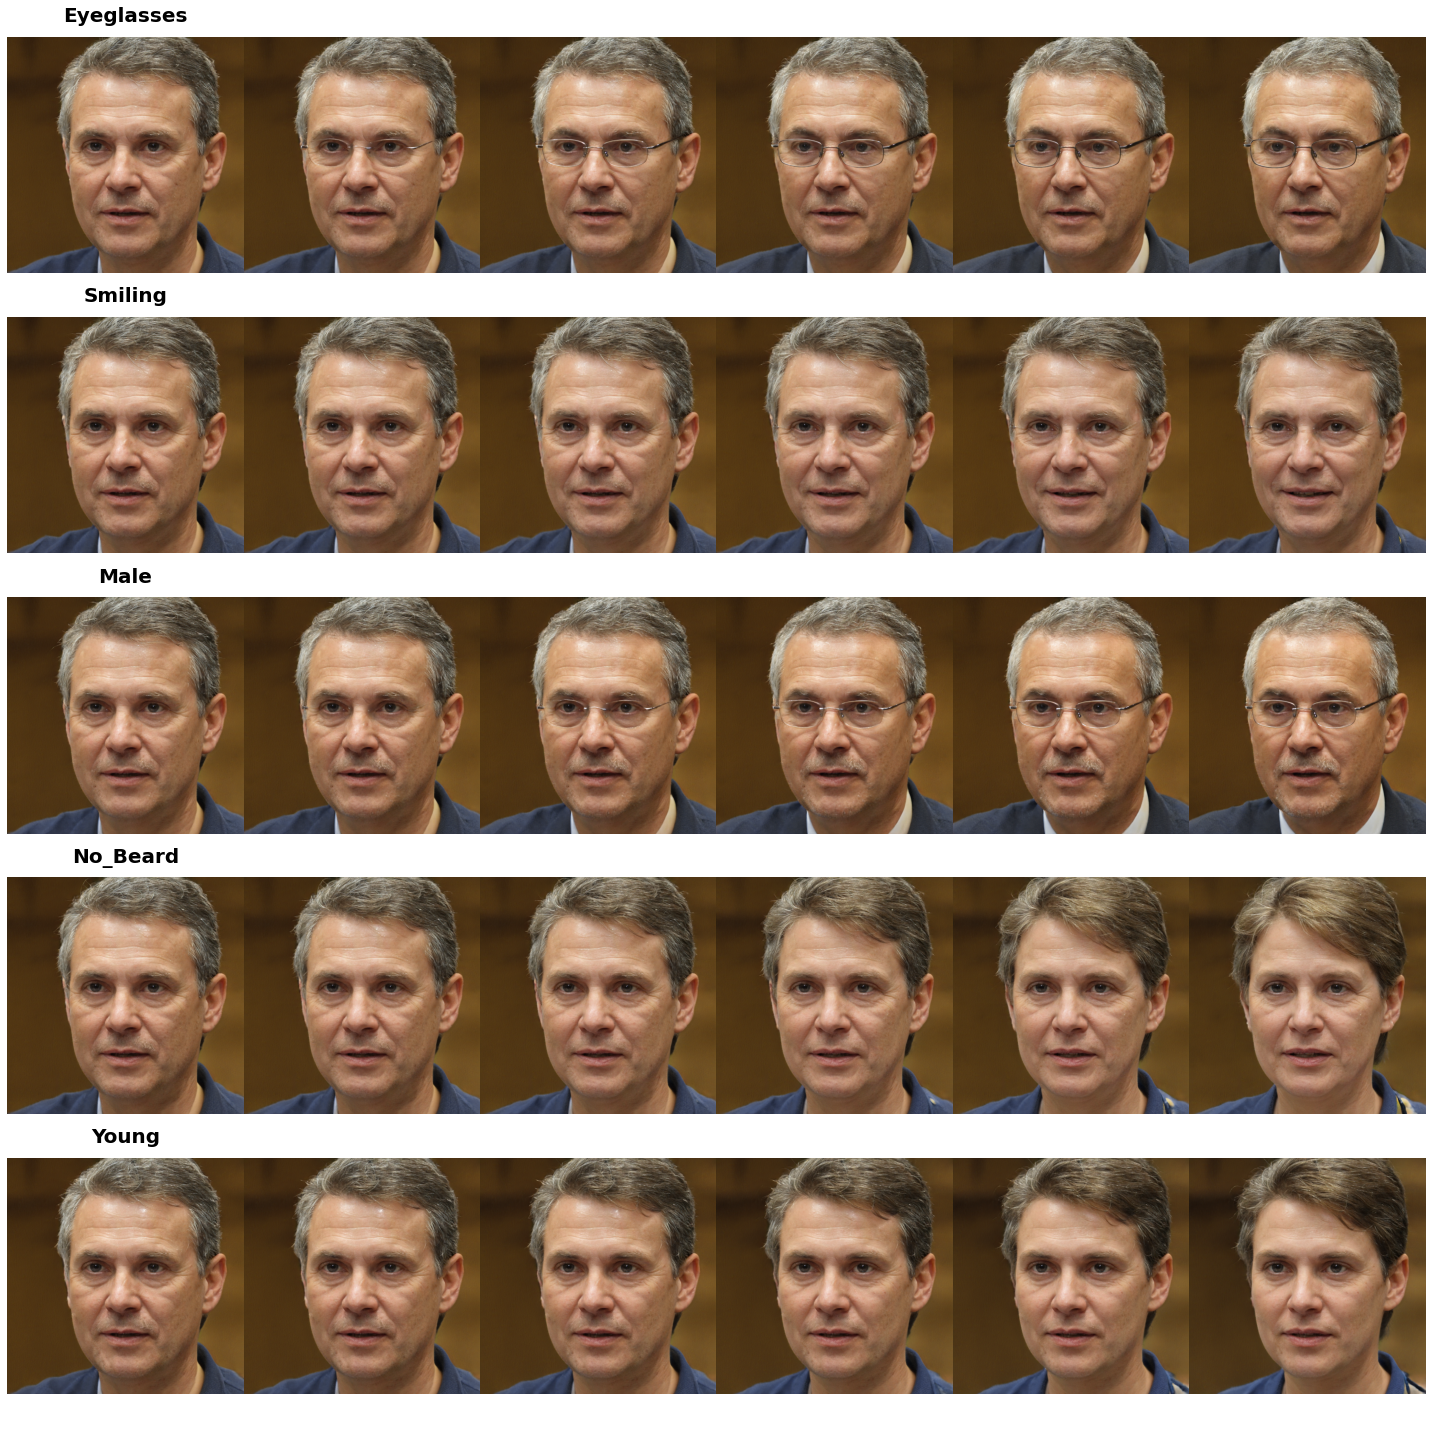

In [126]:
from matplotlib.pyplot import text
rnd = np.random.RandomState(1569)
latents = rnd.randn(1, *gen.Gs.input_shape[1:])
latents

img2 = []
generate = []

# iterate over each feature
for feature_number in range(5):
    generate = []
    # generate 6 images with adding 0.2 more of each feature
    for i in range(6):
        generate.append(latents + i*0.2*feature_direction[:, feature_number])
    
    # append results 
    img2.append(gen.get_images(np.concatenate(np.array(generate), axis=0)))
 

# generate figure
fig = plt.figure(figsize=(20, 20))
columns = 6 # images
rows = 5 # attributes
# for each image feature
for i in range(len(img2)):
    # for each image in current feature
    for j in range(len(img2[i])):
        plt.axis('off')
        fig.tight_layout()
        ax = fig.add_subplot(rows, columns, i*columns+j+1)
        
        if j == 0:
            ax.set_title(feature_names[i], fontsize=20, pad=15, fontweight="bold") # print feature name
        
        plt.subplots_adjust(wspace=0.0) # right next to each other
        plt.imshow(img2[i][j]/255) # show image

plt.axis('off')
plt.show()

## Optional: Next notebook
This was all from controlled image generation.

Continue to 05_experiment_parsing.